# Image Warping
**Name: Ahmed AlAbri**

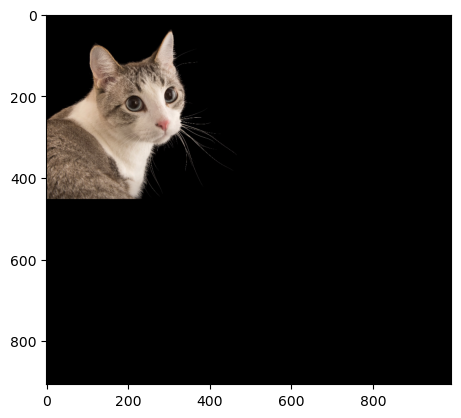

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_affine(x, x_prime):
    A = np.array([
        [x[0][0], x[0][1], 1, 0, 0, 0],
        [0, 0, 0, x[0][0], x[0][1], 1],
        [x[1][0], x[1][1], 1, 0, 0, 0],
        [0, 0, 0, x[1][0], x[1][1], 1],
        [x[2][0], x[2][1], 1, 0, 0, 0],
        [0, 0, 0, x[2][0], x[2][1], 1]
    ])
    b = np.array([
        x_prime[0][0],
        x_prime[0][1],
        x_prime[1][0],
        x_prime[1][1],
        x_prime[2][0],
        x_prime[2][1]
    ])
    # Check if matrix A is invertible
    if np.linalg.det(A) == 0:
        raise ValueError("Matrix A is not invertible, select different points.")
    affine_params = np.linalg.solve(A, b)
    return np.vstack([affine_params.reshape(2, 3), [0, 0, 1]])

def apply_affine_transform(src_image, dst_image, affine_matrix):
    nrows, ncols, _ = src_image.shape
    for y in range(nrows):
        for x in range(ncols):
            src_coords = np.dot(affine_matrix, np.array([x, y, 1]))
            src_x, src_y = src_coords[0], src_coords[1]
            if 0 <= src_x < ncols and 0 <= src_y < nrows:
                dst_image[y, x] = src_image[int(src_y), int(src_x)]


# Usage
src_image = plt.imread('inverse.jpg')
dst_image = np.zeros_like(src_image)

# Define the source and destination triangle vertices
src_vertices = np.array([[0, 0], [1, 0], [0, 1]])  # Example coordinates
dst_vertices = np.array([[0, 0], [2, 0], [0, 2]])  # Example coordinates

affine_matrix = estimate_affine(src_vertices, dst_vertices)
apply_affine_transform(src_image, dst_image, affine_matrix)

plt.imshow(dst_image)
plt.show()

In [16]:
import cv2
import numpy as np

# Function to handle mouse clicks
def click_event(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f"Point: ({x}, {y})")
        cv2.circle(img, (x, y), 3, (255, 0, 0), -1)
        points.append((x, y))
        if len(points) >= 6:
            print("Max vertices reached.")
            cv2.destroyAllWindows()
        cv2.imshow("image", img)

# Load image
img = cv2.imread('inverse.jpg')
points = []

# Check if the image is loaded
if img is None:
    print("Error: Image not found.")
else:
    cv2.imshow('image', img)
    cv2.setMouseCallback('image', click_event)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

print("Selected Points:", points)

Point: (463, 237)
Point: (263, 490)
Point: (568, 627)
Point: (676, 384)
Point: (605, 86)
Point: (233, 165)
Max vertices reached.
Selected Points: [(463, 237), (263, 490), (568, 627), (676, 384), (605, 86), (233, 165)]


Screenshot of the selected points
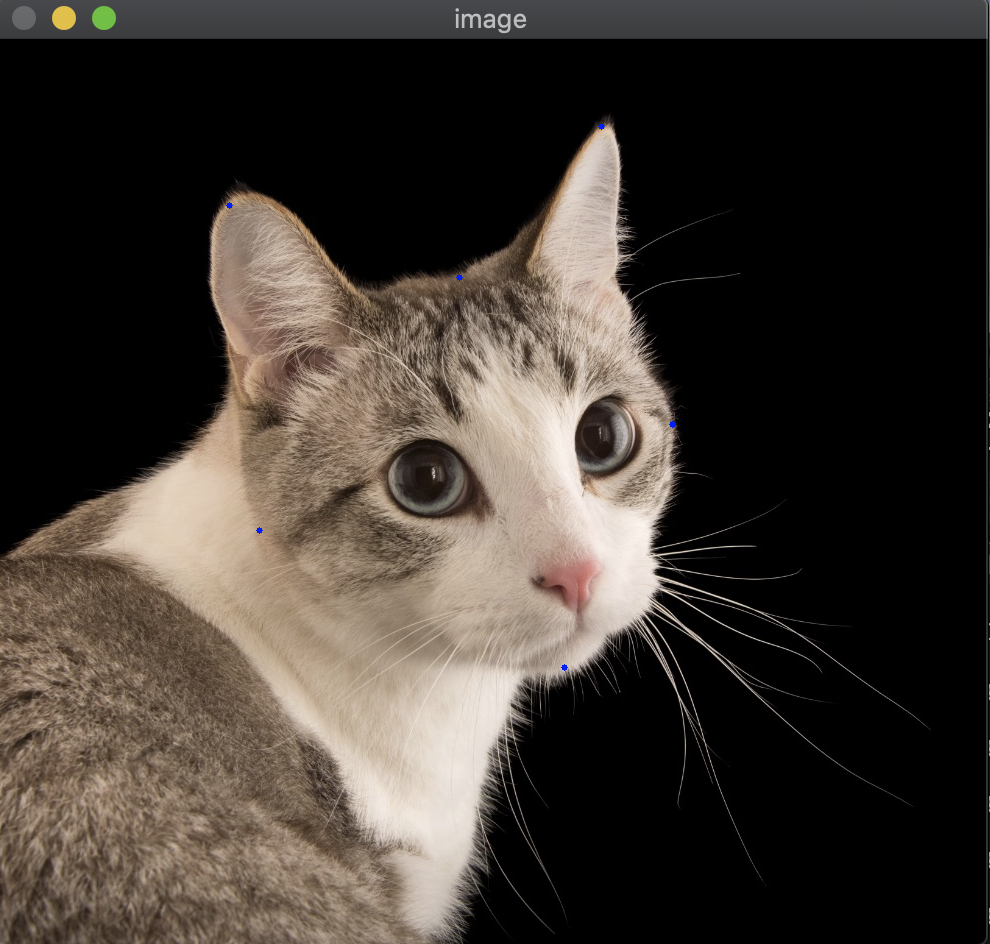

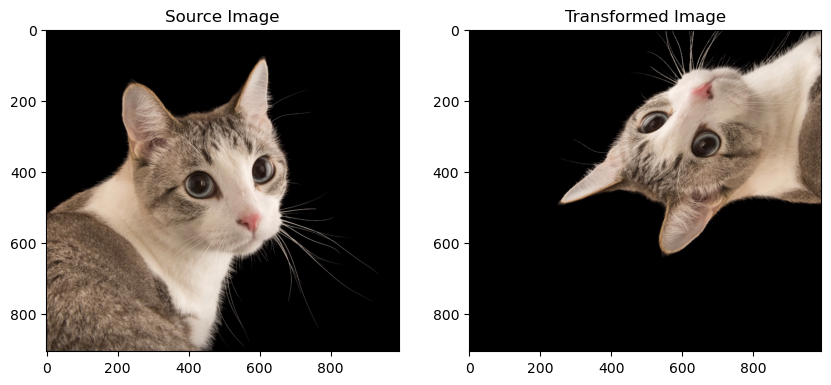

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 

src_vertices = np.array([(463, 237), (263, 490), (568, 627)])
dst_vertices = np.array([(676, 384), (605, 86), (233, 165)])

# Function to estimate the affine transformation matrix
def estimate_affine(x, x_prime):
    A = np.array([
        [x[0][0], x[0][1], 1, 0, 0, 0],
        [0, 0, 0, x[0][0], x[0][1], 1],
        [x[1][0], x[1][1], 1, 0, 0, 0],
        [0, 0, 0, x[1][0], x[1][1], 1],
        [x[2][0], x[2][1], 1, 0, 0, 0],
        [0, 0, 0, x[2][0], x[2][1], 1]
    ])
    b = np.array([
        x_prime[0][0],
        x_prime[0][1],
        x_prime[1][0],
        x_prime[1][1],
        x_prime[2][0],
        x_prime[2][1]
    ])
    if np.linalg.det(A) == 0:
        raise ValueError("Matrix A is not invertible, select different points.")
    affine_params = np.linalg.solve(A, b)
    return np.vstack([affine_params.reshape(2, 3), [0, 0, 1]])

# Function to apply the affine transformation
def apply_affine_transform(src_image, affine_matrix):
    nrows, ncols, channels = src_image.shape
    dst_image = np.zeros_like(src_image)
    for y in range(nrows):
        for x in range(ncols):
            src_coords = np.dot(affine_matrix, np.array([x, y, 1]))
            src_x, src_y = int(src_coords[0]), int(src_coords[1])
            if 0 <= src_x < ncols and 0 <= src_y < nrows:
                dst_image[y, x] = src_image[src_y, src_x]
    return dst_image

# Load image
src_image = cv2.imread('inverse.jpg') 
if src_image is None:
    print("Error loading image")
else:
    # Estimate the affine transformation matrix
    affine_matrix = estimate_affine(src_vertices, dst_vertices)

    # Apply the affine transformation
    dst_image = apply_affine_transform(src_image, affine_matrix)

    # Display the original and transformed images
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(cv2.cvtColor(src_image, cv2.COLOR_BGR2RGB))
    plt.title('Source Image')
    plt.subplot(122)
    plt.imshow(cv2.cvtColor(dst_image, cv2.COLOR_BGR2RGB))
    plt.title('Transformed Image')
    plt.show()